<a href="https://colab.research.google.com/github/pavankakadiya/Diabetes_Health_Indicators/blob/main/M606_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload and Load Dataset

In [8]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("Diabetes_Health_Indicators.csv")

df.head()


Saving Diabetes_Health_Indicators.csv to Diabetes_Health_Indicators.csv


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Data Preprocessing

In [9]:
# Check for missing values
print(df.isnull().sum())


Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


# **Linear Regression Model**

Split Dataset into Train & Test Sets

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Diabetes_012'])
y = df['Diabetes_012']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (202944, 21)
Testing set shape: (50736, 21)


Train the Linear Regression Model.

In [11]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print(y_pred[:5])


[ 0.14698526  0.53479451 -0.14492429 -0.09938615  0.58267228]


Evaluate the Model

In [12]:
from sklearn.metrics import mean_squared_error, r2_score

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# R-squared score
r2 = r2_score(y_test, y_pred)
print("R-squared Score:", r2)


Mean Squared Error: 0.3997537253620238
R-squared Score: 0.17330978646059458


Your Linear Regression model's performance:

Mean Squared Error (MSE) → 0.3997 (lower is better)

R-squared Score (R²) → 0.1733 (closer to 1 is better)

Interpretation:
The R² score is quite low (0.17), meaning the model is not explaining much variance in the target variable.

Linear Regression might not be the best fit for this dataset because it's likely complex and non-linear.



Actual vs. Predicted Values (Scatter Plot)

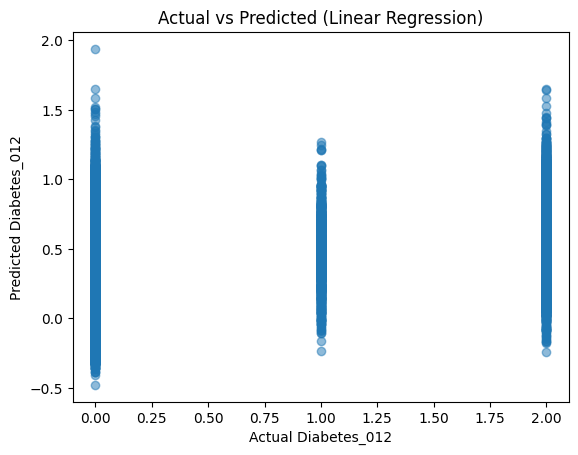

In [13]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Diabetes_012")
plt.ylabel("Predicted Diabetes_012")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()


Residual Plot (Errors Distribution)

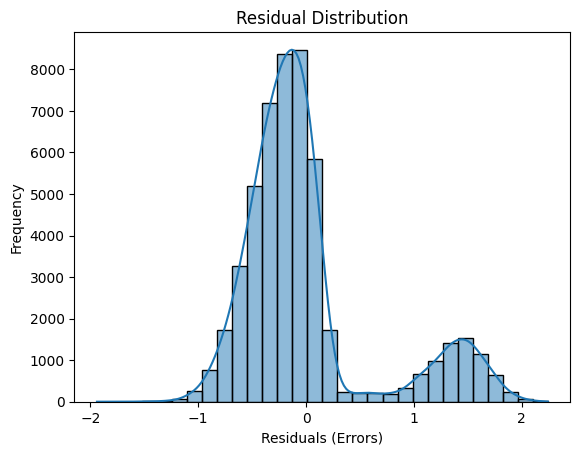

In [14]:
import seaborn as sns

residuals = y_test - y_pred
sns.histplot(residuals, kde=True, bins=30)
plt.xlabel("Residuals (Errors)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


Feature Importance (Coefficients Bar Chart)

In [15]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


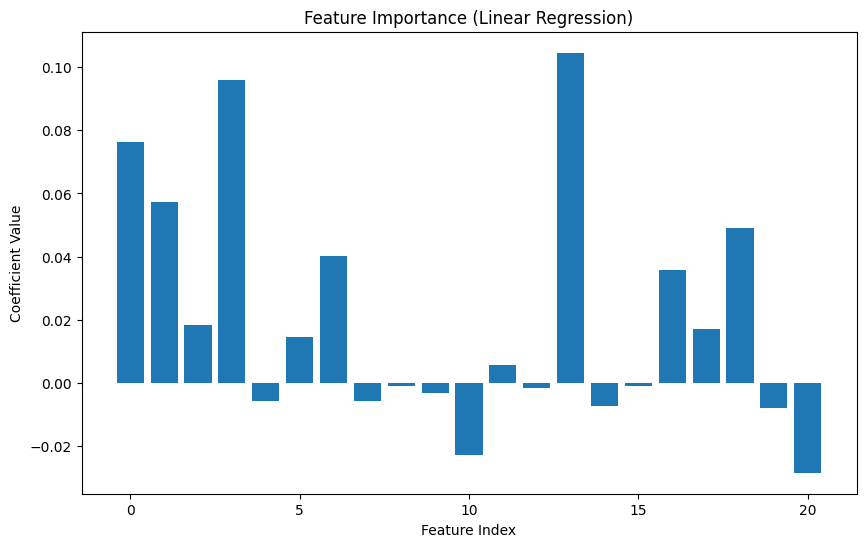

In [16]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(lr.coef_)), lr.coef_)
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Importance (Linear Regression)")
plt.show()


# **K-Nearest Neighbors (KNN)**

Import KNN and Train the Model
python
Copy
Edit


In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Predict using the trained model
y_pred_knn = knn.predict(X_test)


Evaluate KNN Model

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy of the KNN model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy (KNN):", accuracy_knn)

# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):\n", cm_knn)

# Classification Report (Precision, Recall, F1-Score)
print("Classification Report (KNN):\n", classification_report(y_test, y_pred_knn))


Accuracy (KNN): 0.8302783033743298
Confusion Matrix (KNN):
 [[40657    24  2114]
 [  814     1   129]
 [ 5516    14  1467]]
Classification Report (KNN):
               precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     42795
         1.0       0.03      0.00      0.00       944
         2.0       0.40      0.21      0.27      6997

    accuracy                           0.83     50736
   macro avg       0.43      0.39      0.39     50736
weighted avg       0.78      0.83      0.80     50736



Output Explanation:
Accuracy (KNN): 0.83 (83% accuracy), which indicates the model performs fairly well overall but with imbalanced class predictions.

Confusion Matrix:

lua
Copy
Edit
[[40657    24  2114]
 [  814     1   129]
 [ 5516    14  1467]]

Class 0 (No Diabetes):
  The model predicts most instances of class 0 correctly (95% of actual class 0s are predicted correctly), with some misclassifications as class 2.

Class 1 (Prediabetes):
  Very few correct predictions for this class. Most instances of class 1 are misclassified as class 0 or 2.

Class 2 (Diabetes):
  Predictions are better for class 2 than for class 1, but still, there are many misclassifications into class 0.

Classification Report:

-Class 0 (No Diabetes) has a high precision and recall, meaning the model is very good at identifying "no diabetes" cases.

-Class 1 (Prediabetes) has very low precision and recall, indicating the model struggles significantly with predicting this class.

-Class 2 (Diabetes) has a moderate precision and recall, meaning the model can correctly predict diabetes cases, but it still has room for improvement.



**Visualize Confusion Matrix**

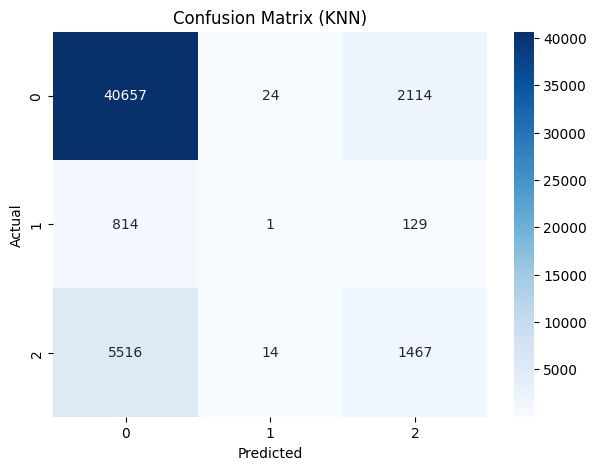

In [19]:
import seaborn as sns

plt.figure(figsize=(7,5))
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", xticklabels=['0', '1', '2'], yticklabels=['0', '1', '2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (KNN)')
plt.show()


# **Random Forest Classifier**

Upload and Import Required Libraries

In [4]:

uploaded = files.upload()

df = pd.read_csv("Diabetes_Health_Indicators.csv")

Saving Diabetes_Health_Indicators.csv to Diabetes_Health_Indicators (1).csv


Load the Data and Preprocess

In [6]:

from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)  # Features (all columns except target)
y = df['Diabetes_012']  # Target variable (the column 'Diabetes_012')

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train the Random Forest Classifier

In [9]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)


In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (Random Forest): {accuracy}")

print("Confusion Matrix (Random Forest):")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print Feature Importance
print("Feature Importance:")
for f in range(X_train.shape[1]):
    print(f"{X.columns[indices[f]]}: {importances[indices[f]]}")

Accuracy (Random Forest): 0.8410990223904131
Confusion Matrix (Random Forest):
[[41294    31  1470]
 [  845     0    99]
 [ 5610     7  1380]]
Classification Report (Random Forest):
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     42795
         1.0       0.00      0.00      0.00       944
         2.0       0.47      0.20      0.28      6997

    accuracy                           0.84     50736
   macro avg       0.44      0.39      0.40     50736
weighted avg       0.79      0.84      0.81     50736

Feature Importance:
BMI: 0.18471957159444277
Age: 0.12282830448630828
Income: 0.09975109969572397
PhysHlth: 0.08401909143515446
Education: 0.07004833832225776
GenHlth: 0.06725009547971338
MentHlth: 0.06450507482455721
HighBP: 0.04092078553618956
Fruits: 0.03397744669361937
Smoker: 0.03380439178767776
Sex: 0.02887344008553695
Veggies: 0.026639864088961893
PhysActivity: 0.026342203271445062
HighChol: 0.026325799876622587
DiffWalk: 0.02

Plot Confusion Matrix

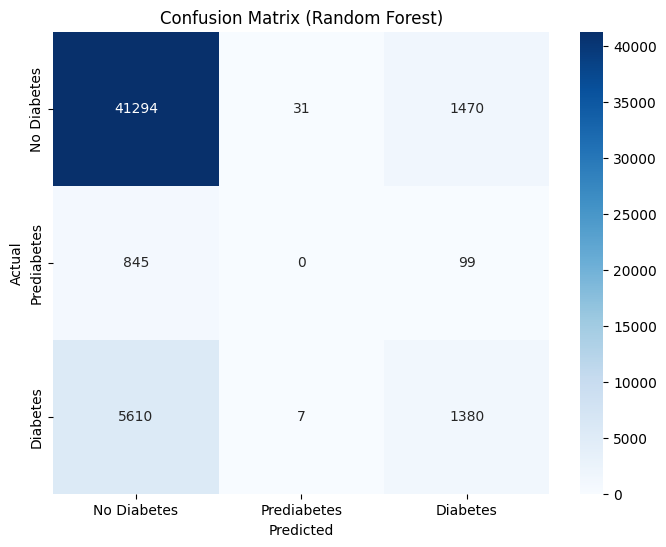

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Prediabetes', 'Diabetes'])
plt.title('Confusion Matrix (Random Forest)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



Plot Feature Importance

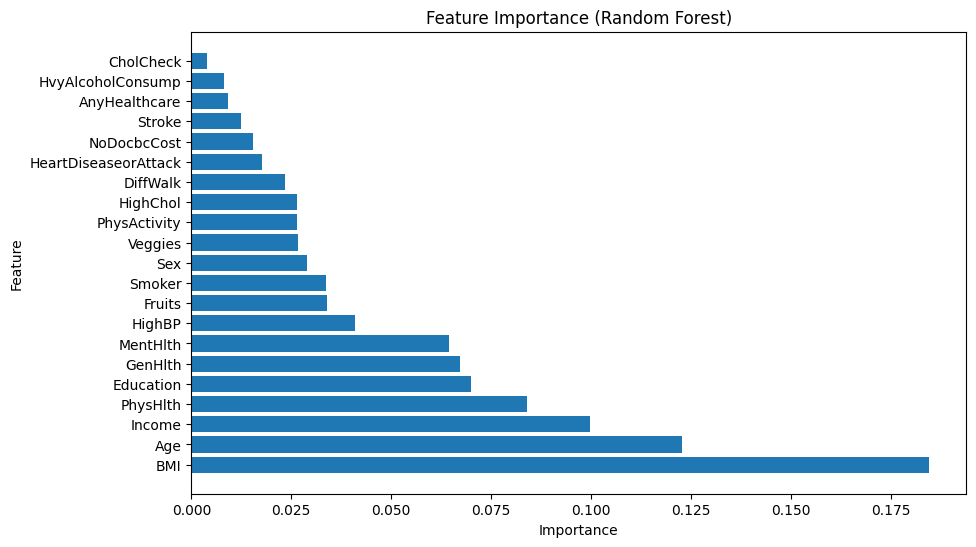

In [17]:
plt.figure(figsize=(10,6))
plt.barh(X.columns[indices], importances[indices])
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# **Linear Regression, KNN, and Random Forest**

Create a function to evaluate each model:

In [18]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

def evaluate_model(model, X_test, y_test):
    """Evaluates a model and returns its performance metrics."""

    y_pred = model.predict(X_test)

    if isinstance(model, (LinearRegression)):  # For regression models
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        return {'mse': mse, 'r2': r2}
    else:  # For classification models (KNN, Random Forest)
        accuracy = accuracy_score(y_test, y_pred)
        return {'accuracy': accuracy}

Train and evaluate all models:

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize models
lr_model = LinearRegression()
knn_model = KNeighborsClassifier(n_neighbors=5)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
lr_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)

# Evaluate models
lr_results = evaluate_model(lr_model, X_test_scaled, y_test)
knn_results = evaluate_model(knn_model, X_test_scaled, y_test)
rf_results = evaluate_model(rf_model, X_test_scaled, y_test)

# Print results
print("Linear Regression:", lr_results)
print("K-Nearest Neighbors:", knn_results)
print("Random Forest:", rf_results)

Linear Regression: {'mse': 0.3997537253620238, 'r2': 0.17330978646059458}
K-Nearest Neighbors: {'accuracy': 0.8302783033743298}
Random Forest: {'accuracy': 0.8413355408388521}


**Compare results and determine the best model:**

In [21]:

if knn_results['accuracy'] > rf_results['accuracy']:
    best_model = "K-Nearest Neighbors"
else:
    best_model = "Random Forest"

print(f"The best model is: {best_model}")

The best model is: Random Forest
